# Assignment 2 (10 Marks)

Please submit this file only.

Name: 

Student ID:  

## Question 1

Please use this same dataset as in Assignment 1 for the following plot:

Visualize the time series for Regular Unleaded Gasoline prices in Ottawa from 2000 to 2023. Smooth the time series using a simple moving average with a window size of 40. Plot both the original time series and its trend in one plot.

Your visualization should be complete.

In [2]:
import pandas as pd

df = pd.read_csv('data/energy-price.csv')
df['Date'] = pd.to_datetime(df['Date'])

C:\Users\vikas\AppData\Local\Temp\ipykernel_16768\3895685259.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


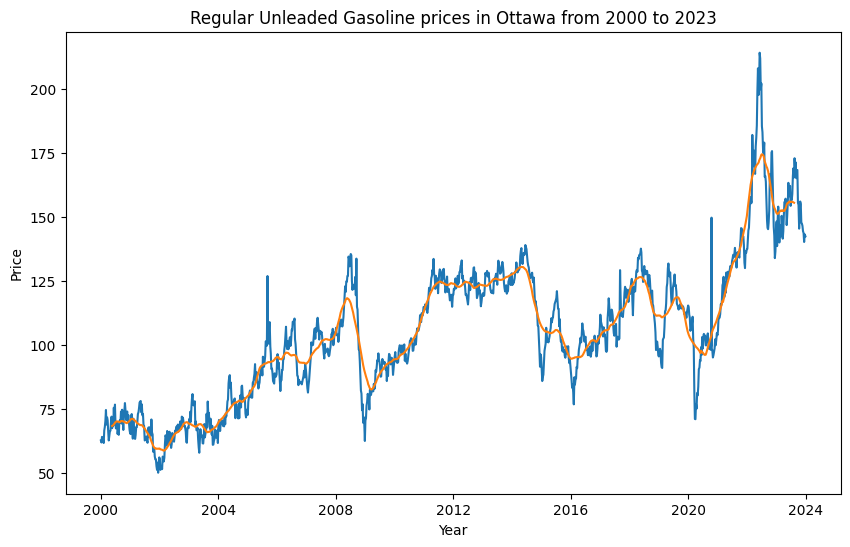

In [3]:
import matplotlib.pyplot as plt
import numpy as np
df['Date'] = pd.to_datetime(df['Date'])
df_2000_2023 = df[(df['Date'].dt.year >= 2000) & (df['Date'].dt.year <= 2023)]
df_2000_2023 = df_2000_2023[df_2000_2023['Fuel Type'] == 'Regular Unleaded Gasoline']
# only get the columns Date and Ottawa
df_2000_2023 = df_2000_2023[['Date', 'Ottawa']]
df_2000_2023 = df_2000_2023.sort_values('Date')
plt.figure(figsize=(10,6))
plt.plot(df_2000_2023['Date'], df_2000_2023['Ottawa'], label='Ottawa')
plt.title('Regular Unleaded Gasoline prices in Ottawa from 2000 to 2023')
plt.xlabel('Year')
plt.ylabel('Price')
#Smooth the time series using a simple moving average with a window size of 40.
rolling_mean = df_2000_2023['Ottawa'].rolling(window=40, center=True).mean()
plt.plot(df_2000_2023['Date'], rolling_mean, label='Trend')


## Question 2

Please plot a map of Canada showing the volcanoes and earthquakes, with the earthquakes' magnitude represented by color. Your visualization should be complete.

Data sources:
https://github.com/plotly/datasets/blob/master/volcano_db.csv
https://earthquakescanada.nrcan.gc.ca/stndon/NEDB-BNDS/bulletin-en.php

In [25]:
import pandas as pd
import geopandas 

## volcanoes in the world
volcano = pd.read_csv('data/volcano_db.csv', encoding = "ISO-8859-1")
## world map
world = geopandas.read_file(geopandas.datasets.get_path('naturalearth_lowres'))
canada = world[world['name'] == 'Canada']
## earthquakes in Canada
earthquake = pd.read_csv('data/earthquake.txt',sep='|')

C:\Users\vikas\AppData\Local\Temp\ipykernel_16768\418329533.py:7: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = geopandas.read_file(geopandas.datasets.get_path('naturalearth_lowres'))


In [12]:
volcano.columns

Index(['Number', 'Volcano Name', 'Country', 'Region', 'Latitude', 'Longitude',
       'Elev', 'Type', 'Status', 'Last Known'],
      dtype='object')

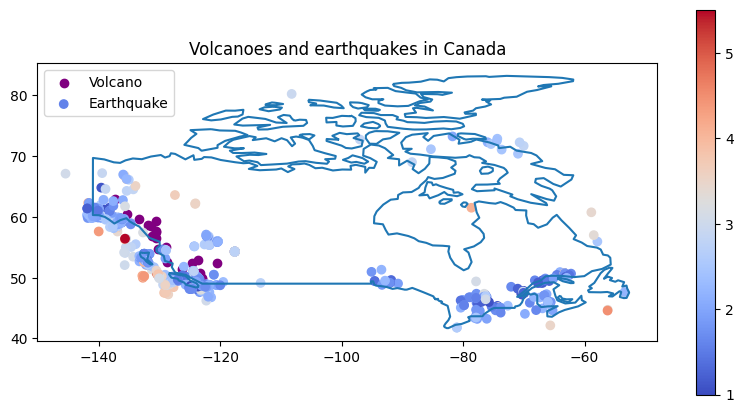

In [26]:
# write your code here
# volcano
volcano = volcano[volcano['Country'] == 'Canada']
volcano = volcano[['Volcano Name', 'Latitude', 'Longitude']]
volcano = geopandas.GeoDataFrame(volcano, geometry=geopandas.points_from_xy(volcano.Longitude, volcano.Latitude))
# earthquake earthquakes' magnitude represented by color
earthquake = earthquake[['Latitude', 'Longitude', 'Magnitude']]
earthquake = geopandas.GeoDataFrame(earthquake, geometry=geopandas.points_from_xy(earthquake.Longitude, earthquake.Latitude))
# plot
fig, ax = plt.subplots(figsize=(10,10))
canada.boundary.plot(ax=ax)
volcano.plot(ax=ax, color='purple', label='Volcano')
earthquake.plot(ax=ax, column='Magnitude', cmap='coolwarm', legend=True, legend_kwds={'shrink': 0.5}, label='Earthquake')
plt.title('Volcanoes and earthquakes in Canada')
plt.legend(fontsize=10, loc='upper left')

plt.show()
